In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats

import code_support

from sklearn.cluster import DBSCAN, KMeans, MeanShift
from sklearn.neighbors import NearestNeighbors as nn
from sklearn.metrics import pairwise_distances
import sklearn

In [7]:
import imp
imp.reload(code_support);

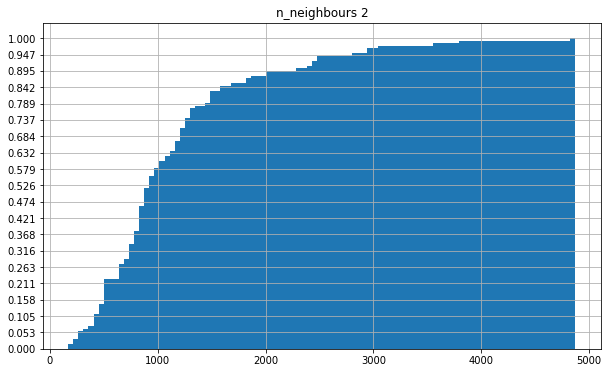

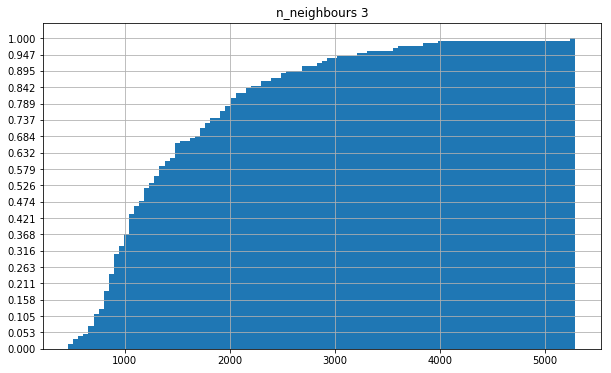

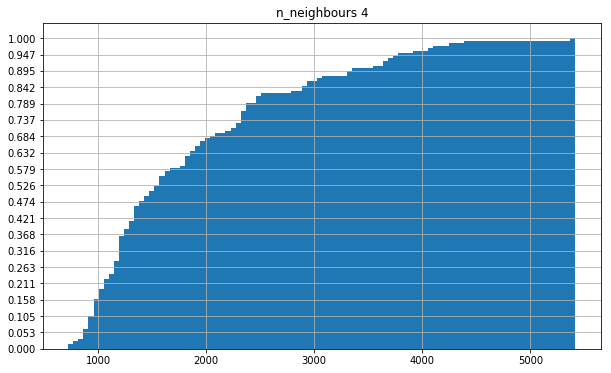

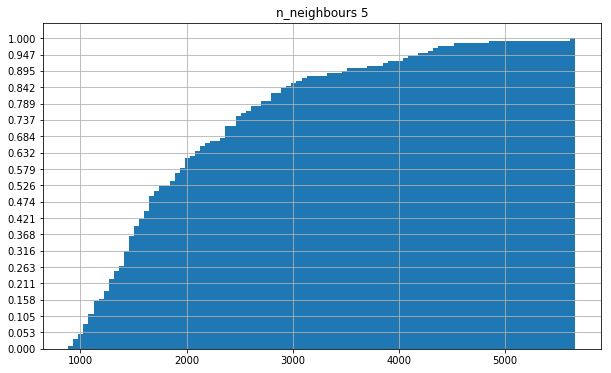

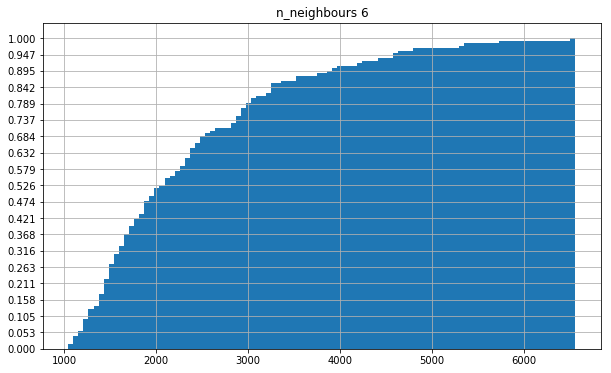

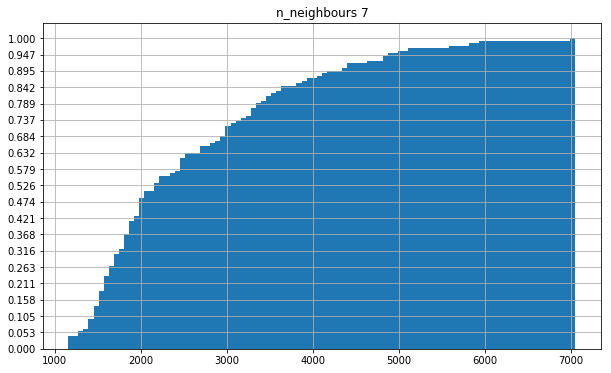

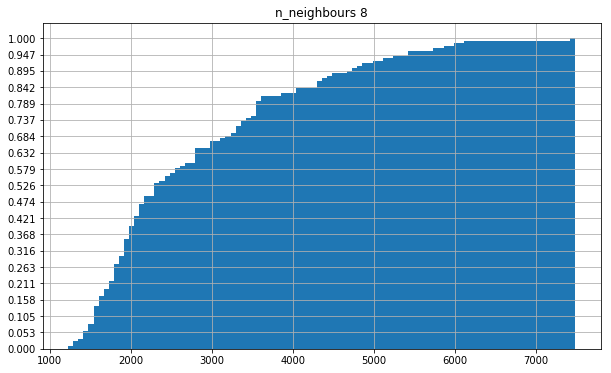

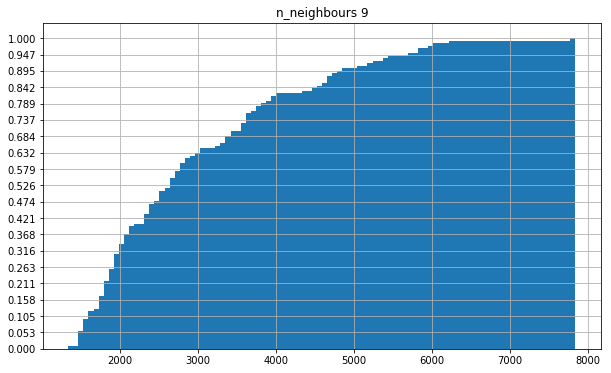

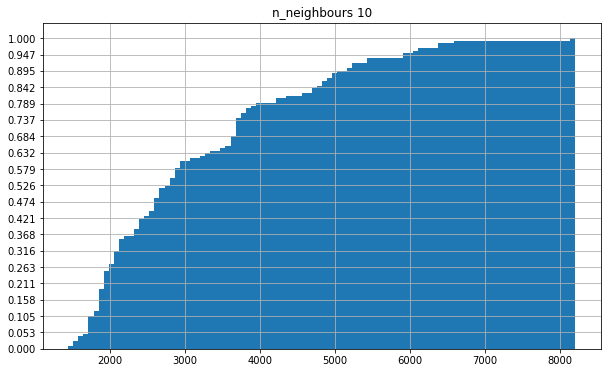

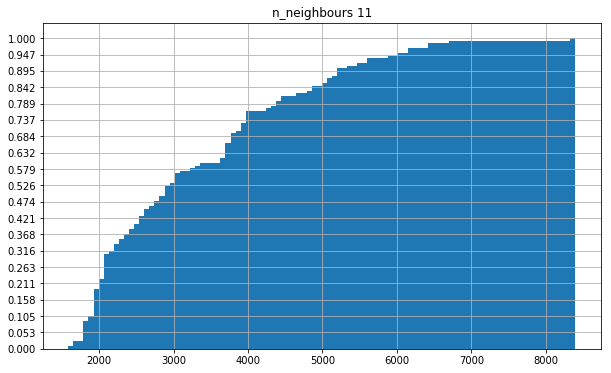

In [141]:
%matplotlib inline
for n_neighbours in range(2, 12):
    nbrs = nn(n_neighbors=n_neighbours+1, algorithm='ball_tree').fit(points_xyz)
    dist, ind = nbrs.kneighbors(points_xyz)
    dist_to_nneighbor = dist[:,n_neighbours]

    dist_to_nneighbor.sort()
    fragment = dist_to_nneighbor[:]
    
    
    fig = plt.figure(figsize=(10, 6))
    plt.yticks(np.linspace(0, 1.0, 20))
    num = plt.hist(fragment, bins=100,  cumulative=True, density=True)
    plt.title("n_neighbours {0}".format(n_neighbours))
    plt.grid(True)
    plt.show()
    #%matplotlib inline

### KMean

In [25]:
k_means = KMeans(n_clusters=1)
res = k_means.fit(points_xyz)
cen = res.cluster_centers_

In [26]:
cen.T

array([[ 7939.27878992],
       [ 3073.69789383],
       [ 2711.71730961]])

### DBSCAN

In [372]:
def do_scan(points_xyz, n_neighbors, eps, verbose=False):
    #n_neighbours = 6
    #eps = 1400
    num_clusters_inter = 4
    
    dbscan = DBSCAN(eps=eps, min_samples=n_neighbours+1).fit(points_xyz)
    cen_dbscan = points_xyz[dbscan.labels_==0].mean(axis=0)

    clusters = list()
    cen_clusters = list()

    labels, count_labels = np.unique(dbscan.labels_, return_counts=True)
    most_freq_labels = labels[np.argsort(count_labels)[::-1][:num_clusters_inter]]

    for lab in most_freq_labels:
        if lab == -1:
            continue
        clusters.append(points_xyz[dbscan.labels_==lab])    
        cen_clusters.append(clusters[-1].mean(axis=0))
        if verbose:
            print('for label', lab, 'there are', clusters[-1].shape[0], 'galaxies')
    
    noize = points_xyz[dbscan.labels_==-1]
    if verbose:
        print('noize num : ', noize.shape)

    return clusters, cen_clusters, noize, dbscan.labels_

In [126]:
dir_path = 'data/Abell less 0.3 chosen/'
list_nums = list()
for i in range(1, 2714):
    name_file = 'Abell_' + str(i) + ' less 0.3 chosen.txt'
    full_path = dir_path + name_file
    try:
        data = code_support.reader(full_path, skip_lines=1)
        list_nums.append(data.shape[0])
        print(i,':  ', data.shape[0])
    except IOError:
        print(i,':   0')
    
    

1 :   284
2 :   0
3 :   71
4 :   124
5 :   127
6 :   44
7 :   29
8 :   234
9 :   127
10 :   86
11 :   0
12 :   81
13 :   0
14 :   0
15 :   0
16 :   85
17 :   32
18 :   59
19 :   26
20 :   0
21 :   121
22 :   0
23 :   762
24 :   85
25 :   275
26 :   22
27 :   0
28 :   91
29 :   0
30 :   75
31 :   49
32 :   213
33 :   0
34 :   0
35 :   0
36 :   0
37 :   24
38 :   334
39 :   0
40 :   146
41 :   37
42 :   0
43 :   78
44 :   126
45 :   0
46 :   0
47 :   0
48 :   0
49 :   28
50 :   0
51 :   0
52 :   0
53 :   52
54 :   92
55 :   109
56 :   20
57 :   41
58 :   17
59 :   90
60 :   18
61 :   0
62 :   111
63 :   0
64 :   161
65 :   0
66 :   49
67 :   0
68 :   131
69 :   0
70 :   29
71 :   32
72 :   0
73 :   30
74 :   0
75 :   84
76 :   54
77 :   28
78 :   69
79 :   23
80 :   0
81 :   34
82 :   50
83 :   230
84 :   86
85 :   301
86 :   0
87 :   45
88 :   0
89 :   0
90 :   254
91 :   0
92 :   18
93 :   0
94 :   228
95 :   392
96 :   0
97 :   0
98 :   53
99 :   0
100 :   29
101 :   75
102 :   87
103

898 :   33
899 :   127
900 :   375
901 :   0
902 :   0
903 :   140
904 :   72
905 :   40
906 :   43
907 :   0
908 :   74
909 :   0
910 :   23
911 :   0
912 :   220
913 :   74
914 :   0
915 :   140
916 :   0
917 :   138
918 :   0
919 :   175
920 :   161
921 :   433
922 :   0
923 :   198
924 :   194
925 :   95
926 :   94
927 :   75
928 :   328
929 :   181
930 :   0
931 :   0
932 :   310
933 :   172
934 :   327
935 :   75
936 :   266
937 :   280
938 :   44
939 :   0
940 :   0
941 :   243
942 :   59
943 :   267
944 :   77
945 :   0
946 :   149
947 :   81
948 :   0
949 :   226
950 :   131
951 :   135
952 :   75
953 :   0
954 :   260
955 :   0
956 :   130
957 :   19
958 :   233
959 :   74
960 :   35
961 :   122
962 :   51
963 :   170
964 :   133
965 :   256
966 :   0
967 :   213
968 :   0
969 :   215
970 :   0
971 :   94
972 :   48
973 :   466
974 :   311
975 :   39
976 :   0
977 :   122
978 :   0
979 :   0
980 :   200
981 :   0
982 :   105
983 :   73
984 :   229
985 :   152
986 :   31
987 :

1657 :   156
1658 :   49
1659 :   266
1660 :   193
1661 :   56
1662 :   350
1663 :   91
1664 :   0
1665 :   99
1666 :   83
1667 :   163
1668 :   175
1669 :   46
1670 :   76
1671 :   0
1672 :   104
1673 :   43
1674 :   90
1675 :   57
1676 :   195
1677 :   42
1678 :   122
1679 :   20
1680 :   392
1681 :   0
1682 :   151
1683 :   0
1684 :   319
1685 :   64
1686 :   186
1687 :   156
1688 :   22
1689 :   451
1690 :   235
1691 :   222
1692 :   95
1693 :   158
1694 :   102
1695 :   163
1696 :   54
1697 :   114
1698 :   0
1699 :   0
1700 :   181
1701 :   54
1702 :   105
1703 :   161
1704 :   85
1705 :   0
1706 :   303
1707 :   138
1708 :   45
1709 :   0
1710 :   127
1711 :   397
1712 :   175
1713 :   102
1714 :   132
1715 :   229
1716 :   0
1717 :   81
1718 :   111
1719 :   36
1720 :   322
1721 :   253
1722 :   0
1723 :   19
1724 :   313
1725 :   0
1726 :   349
1727 :   0
1728 :   202
1729 :   300
1730 :   101
1731 :   54
1732 :   0
1733 :   363
1734 :   204
1735 :   218
1736 :   0
1737 :   13

2350 :   97
2351 :   0
2352 :   0
2353 :   378
2354 :   0
2355 :   487
2356 :   76
2357 :   0
2358 :   0
2359 :   0
2360 :   0
2361 :   0
2362 :   0
2363 :   363
2364 :   0
2365 :   0
2366 :   80
2367 :   29
2368 :   0
2369 :   0
2370 :   0
2371 :   0
2372 :   0
2373 :   333
2374 :   70
2375 :   0
2376 :   0
2377 :   0
2378 :   0
2379 :   121
2380 :   0
2381 :   155
2382 :   0
2383 :   0
2384 :   0
2385 :   0
2386 :   58
2387 :   0
2388 :   65
2389 :   27
2390 :   89
2391 :   0
2392 :   314
2393 :   24
2394 :   0
2395 :   21
2396 :   116
2397 :   85
2398 :   27
2399 :   581
2400 :   0
2401 :   0
2402 :   55
2403 :   0
2404 :   0
2405 :   0
2406 :   113
2407 :   41
2408 :   24
2409 :   59
2410 :   87
2411 :   93
2412 :   0
2413 :   42
2414 :   43
2415 :   0
2416 :   0
2417 :   0
2418 :   0
2419 :   100
2420 :   0
2421 :   131
2422 :   130
2423 :   25
2424 :   211
2425 :   39
2426 :   124
2427 :   0
2428 :   217
2429 :   92
2430 :   79
2431 :   0
2432 :   0
2433 :   131
2434 :   0
2435 :

In [505]:
dir_path = 'data/Abell less 0.3 chosen/'
list_nums = list()

coef_hugest_cluster = 0.4
coef_2_clusters = 0.3
coef_1st_to_2nd = 0.25


all_clusters = list()
not_big = 0
two_small = 0
not_big_70 = 0
bad_alg = 0
two_clusters = 0
bad_cluster = 0 

for i in range(1, 2714):
    name_file = 'Abell_' + str(i) + ' less 0.3 chosen.txt'
    full_path = dir_path + name_file
    try:
        data = code_support.reader(full_path, skip_lines=1)
        list_nums.append(data.shape[0])
    except IOError:
        continue
    
    points_xyz, ray = get_one(full_path)
    num_galaxies = points_xyz.shape[0]
    
    if num_galaxies < 40:
        continue
    pair_dist = pairwise_distances(points_xyz)
    not_zero_pair = np.triu(pair_dist)

    med = np.median(not_zero_pair[not_zero_pair!=0])
    
    #print(num_galaxies)
    
    if num_galaxies > 100:
        clusters, cen_clusters, noize, labels_ = do_scan(points_xyz, n_neighbors=5, eps=med*0.25)
    
    else:
        clusters, cen_clusters, noize, labels_ = do_scan(points_xyz, n_neighbors=3, eps=med*0.2)
    
    if len(clusters) == 0:
        bad_alg += 1
        clusters, cen_clusters, noize, labels_ = do_scan(points_xyz, n_neighbors=2, eps=med*0.1)
        if len(clusters) == 0:
            bad_cluster += 1
            all_clusters.append(points_xyz.mean(axis=0))
            continue
    
    num_bigest = clusters[0].shape[0]
    
    
    if len(clusters) == 1:
        num_second = 0
    else:
        num_second = clusters[1].shape[0]
    
    
    
    if num_galaxies > 100:
        if (num_bigest-num_second)/num_bigest < coef_1st_to_2nd:
            if num_bigest > coef_2_clusters:
                all_clusters.append(cen_clusters[0])
                all_clusters.append(cen_clusters[1])
                two_clusters += 1
            else:
                 two_small += 1
        elif num_bigest/num_galaxies > coef_hugest_cluster:
            all_clusters.append(cen_clusters[0])
        
        else:
            not_big += 1
    
    elif num_bigest/num_galaxies > coef_hugest_cluster:
        all_clusters.append(cen_clusters[0])
        
    else:
        not_big_70 += 1
        all_clusters.append(points_xyz.mean(axis=0))
    
    
arr_clusters = np.array(all_clusters)
pair_dist_clusters = pairwise_distances(arr_clusters)
not_zero_pair = np.triu(pair_dist_clusters)
not_zero_pair = not_zero_pair[not_zero_pair!=0]
arr_clusters.shape
to_del = np.unique(np.argwhere((pair_dist_clusters<2) & (pair_dist_clusters>0)).flatten())
arr_clusters = np.delete(arr_clusters, to_del, 0)
num = plt.hist(not_zero_pair, bins=800)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=r

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=r

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=r

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean

<IPython.core.display.Javascript object>


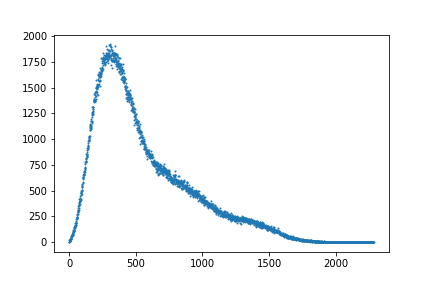

In [543]:
n1 = np.histogram(not_zero_pair, bins=2500)
plt.scatter(n1[1][1:], n1[0], s=1)
plt.show()

In [421]:
def get_one(full_path, print_points=False):
    points = code_support.reader(full_path, skip_lines=1)
    ray = np.zeros((3,))
    #print(points.shape)
    if print_points:
        print(np.max(points[:,0]) - np.min(points[:,0]))
        print(np.max(points[:,1]) - np.min(points[:,1]))
        print(np.max(points[:,0]))
        print('dec')
        print(np.min(points[:,1]))
        print(np.max(points[:,1]))
        #print(points)
        #for point in points:
            #print(point)
    ray = np.array([np.max(points[:,0])-(np.max(points[:,0]) - np.min(points[:,0]))/2, 
                    np.max(points[:,1])-(np.max(points[:,1]) - np.min(points[:,1]))/2, 
                    np.max(points[:,2])])
    points = np.vstack((points, ray))
    coef_scale = 300000.0 / 66.93
    cos_dec = np.cos(points[:,1]*np.pi/180.0)
    sin_dec = np.sin(points[:,1]*np.pi/180.0)
    
    cos_ra = np.cos(points[:,0]*np.pi/180.0)
    sin_ra = np.sin(points[:,0]*np.pi/180.0)
    
    r = points[:,2]
    points_xyz = np.zeros_like(points)
    points_xyz[:,0] = r * cos_dec * cos_ra
    points_xyz[:,1] = r * cos_dec * sin_ra
    points_xyz[:,2] = r * sin_dec 
    points_xyz *= coef_scale
    
    return points_xyz[:-1,:], points_xyz[-1,:]

In [546]:
dir_path = 'data/Abell less 0.3 chosen/'
name_file = 'Abell_3 less 0.3 chosen.txt'

#dir_path = 'data/Abell less 0.3/'
#name_file = 'Abell_g_less_0.3 10.txt'
full_path = dir_path + name_file
points_xyz, ray = get_one(full_path)
print(points_xyz.shape)

(71, 3)


In [565]:
dir_path = 'data/Abell less 0.3 chosen/'
name_file = 'Abell_8 less 0.3 chosen.txt'

#dir_path = 'data/Abell less 0.3/'
#name_file = 'Abell_g_less_0.3 3.txt'
full_path = dir_path + name_file
points_xyz, ray = get_one(full_path)
print(points_xyz.shape)

(234, 3)


(455, 3)
max = 1332.073
mediana = 270.73776954646416
for label 0 there are 276 galaxies
for label 2 there are 60 galaxies
for label 4 there are 35 galaxies
noize num :  (24, 3)


<IPython.core.display.Javascript object>


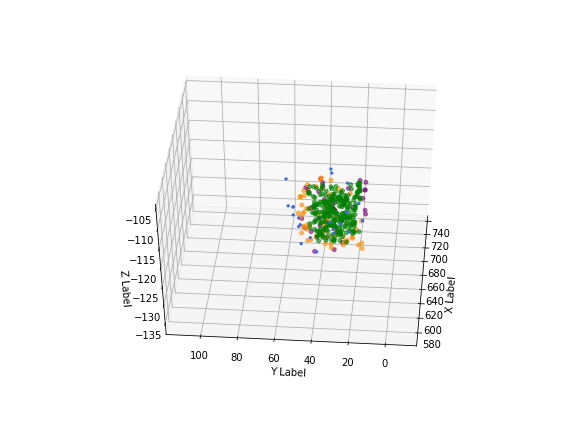

0
1
2


In [574]:
#dir_path = 'data/Abell less 0.3 chosen/'
#name_file = 'Abell_9 less 0.3 chosen.txt'

dir_path = 'data/Abell less 0.3/'
name_file = 'Abell_g_less_0.3 8.txt'

full_path = dir_path + name_file
points_xyz, ray = get_one(full_path)
print(points_xyz.shape)


pair_dist = pairwise_distances(points_xyz)
not_zero_pair = np.triu(pair_dist)
print("max = {0:.3f}".format(np.max(not_zero_pair[not_zero_pair!=0])))

med = np.median(not_zero_pair[not_zero_pair!=0])
print("mediana = {0}".format(med))

clusters, cen_clusters, noize, labels_ = do_scan(points_xyz, n_neighbors=5, eps=med/8, verbose=True)
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
colours = ['royalblue', 'green', 'darkorange', 'purple']
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(0, 0, 0, c='black', s=20)
ax.plot([ray[0]/2, ray[0]], [ray[1]/2, ray[1]], [ray[2]/2, ray[2]], c='black')
for i, cluster in enumerate(clusters):
    print(i)
    if i >= 3:
        break
    ax.scatter(*(cluster.T), c=colours[i+1], s=15, alpha=0.6)
    ax.scatter((*cen_clusters[i]), c=colours[i+1], s=20, marker='D') 
ax.scatter(*(noize.T), c=colours[0], s=5, alpha=1)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.set_zticks([])
#plt.xticks([], [])
#plt.yticks([], [])

plt.axis('equal')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.set_zlim(10, 500)
plt.grid('True')
plt.show()


Using matplotlib backend: nbAgg
